<a href="https://colab.research.google.com/github/poojabhateley/Predict-Career-Related-Industries/blob/master/Industry_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df=pd.read_csv('/content/trainData.csv')


In [37]:
df.head(1)

,Id,company,education,experience,jobdescription,joblocation_address,jobtitle,payrate,skills,industry
0,1,MM Media Pvt Ltd,"UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required",0 - 1 yrs,Job Description Send me Jobs like this Qualifications: - == > 10th To Graduation & Any Skill: - == > Basic Computer Knowledge Job Requirement : - == > System or Laptop Type of job: - == > Full Time or Part time Languages : - == > Tamil & English. Experience : - == > Freshers & Experience payme...,Chennai,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES,Media / Entertainment / Internet


In [38]:
df.dtypes

Id                      int64
company                object
education              object
experience             object
jobdescription         object
joblocation_address    object
jobtitle               object
payrate                object
skills                 object
industry               object
dtype: object

In [39]:
df=df.set_index(['Id'])

In [40]:
df.isnull().sum()


company                   3
education              1224
experience                3
jobdescription            3
joblocation_address     500
jobtitle                  0
payrate                  52
skills                  467
industry                  4
dtype: int64

In [41]:
df.dropna(subset=['jobdescription','skills'],inplace=True)

In [42]:
df['jobdescription']=df['jobdescription'].str[41:]

In [43]:
df['industry']=df['industry'].str.split("/").tolist()

industries=[]

for i in df['industry']:
  industries.append(i)

In [44]:
all_industries = sum(industries,[])
len(set(all_industries))

142

In [45]:
all_industries = nltk.FreqDist(all_industries) 

# create dataframe
all_industries_df = pd.DataFrame({'Industry': list(all_industries.keys()), 
                              'Count': list(all_industries.values())})

In [46]:
all_industries_df.head()

,Industry,Count
0,Media,255
1,Entertainment,255
2,Internet,255
3,Advertising,230
4,PR,230


In [47]:
industries_list=all_industries_df['Industry'].tolist()

In [48]:
industries_list[0:5]

['Media ', ' Entertainment ', ' Internet', 'Advertising ', ' PR ']

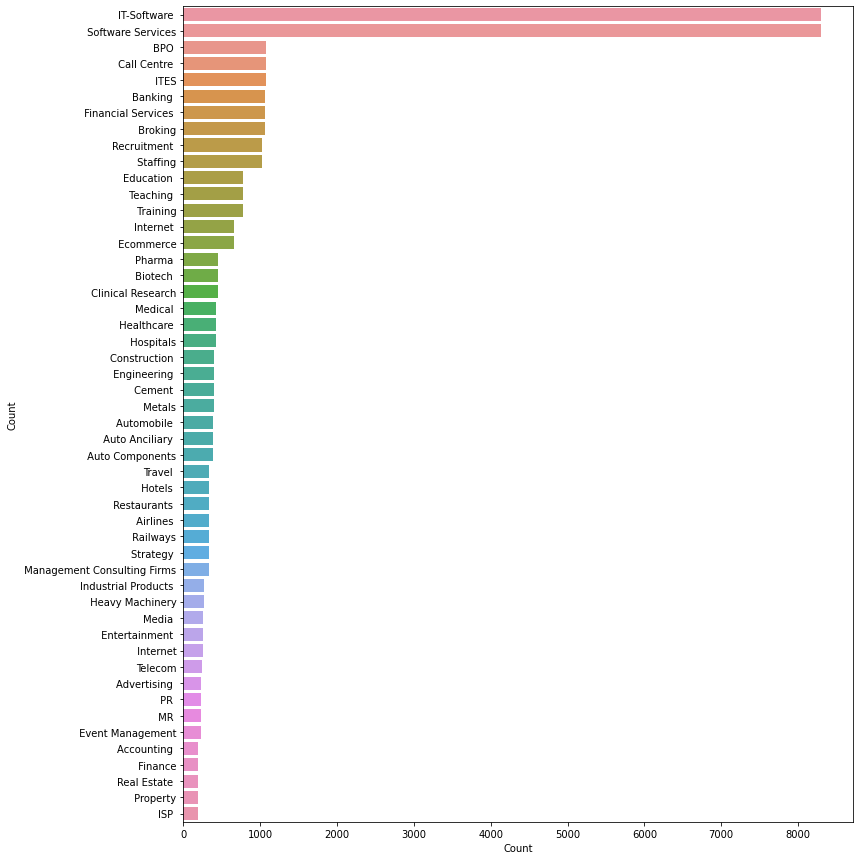

In [49]:
g = all_industries_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Industry") 
ax.set(ylabel = 'Count') 
plt.show()

In [50]:
#df['skills']=df['skills'].str.split("/").tolist()

#skills=[]

#for i in df['skills']:
  #skills.append(i)

In [51]:
#all_skills = sum(skills,[])
#len(set(all_skills))

In [55]:
#all_skills = nltk.FreqDist(all_skills) 

# create dataframe
#all_skills_df = pd.DataFrame({'Skill': list(all_skills.keys()), 
                              #'Count': list(all_skills.values())})

In [56]:
#all_skills_df.head()

In [57]:
#skills_list=all_skills_df['Skill'].tolist()

In [58]:
#skills_list[0:5]

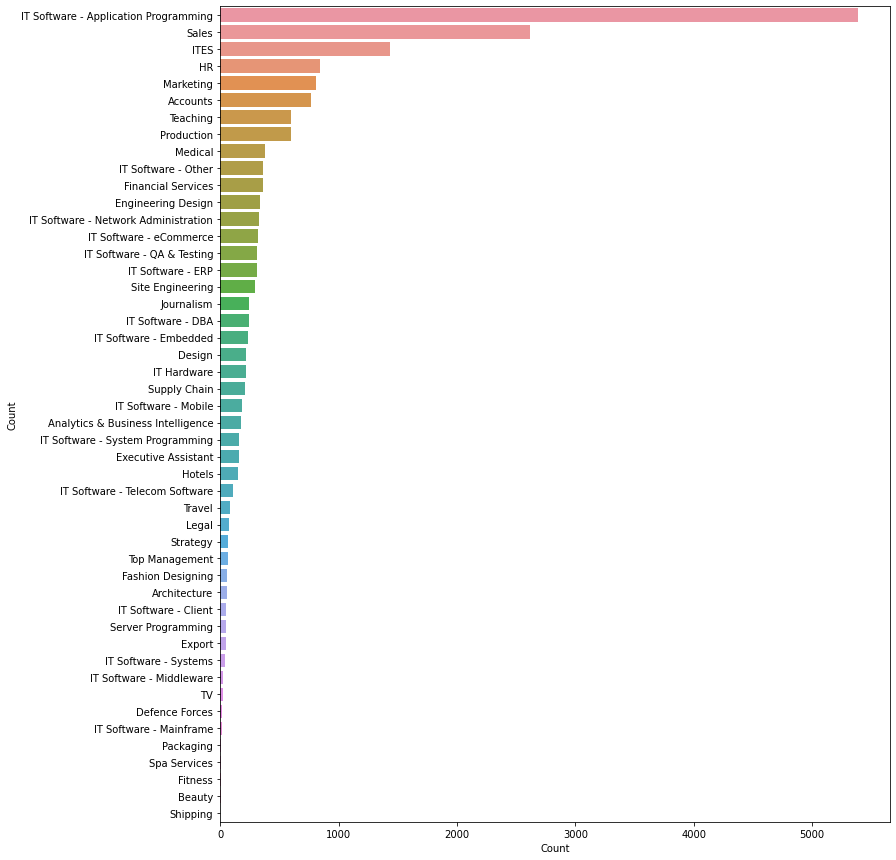

In [23]:
#g = all_skills_df.nlargest(columns="Count", n = 50) 
#plt.figure(figsize=(12,15)) 
#ax = sns.barplot(data=g, x= "Count", y = "Skill") 
#ax.set(ylabel = 'Count') 
#plt.show()

In [59]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z0-9 -]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    text = re.sub("-", "", text) 
    return text

In [73]:
def clean_text2(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", " ", text) 
    # remove everything except alphabets 
    #text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    
    return text

In [61]:
df['clean_jobdescription']=df['jobdescription'].apply(lambda x:clean_text(x))

In [62]:
df['clean_jobdescription'].head(2)

Id
1    qualifications  10th to graduation any skill  basic computer knowledge job requirement  system or laptop type of job  full time or part time languages  tamil english experience  freshers experience payment details  1 form per day 5  10 form per day 50  100 form per day 500  monthly you can earn ...
2    qualifications  10th to graduation any skill  basic computer knowledge job requirement  system or laptop type of job  full time or part time languages  tamil english experience  freshers experience payment details  1 form per day 5  10 form per day 50  100 form per day 500  monthly you can earn ...
Name: clean_jobdescription, dtype: object

In [63]:
df['skills'].head(2)

Id
1         ITES
2    Marketing
Name: skills, dtype: object

In [74]:
df['clean_skills']=df['skills'].apply(lambda x:clean_text2(x))

In [75]:
df['clean_skills'].head(5)

Id
1                                     ites
2                                marketing
3    it software - application programming
4                                 accounts
5    it software - application programming
Name: clean_skills, dtype: object

In [66]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

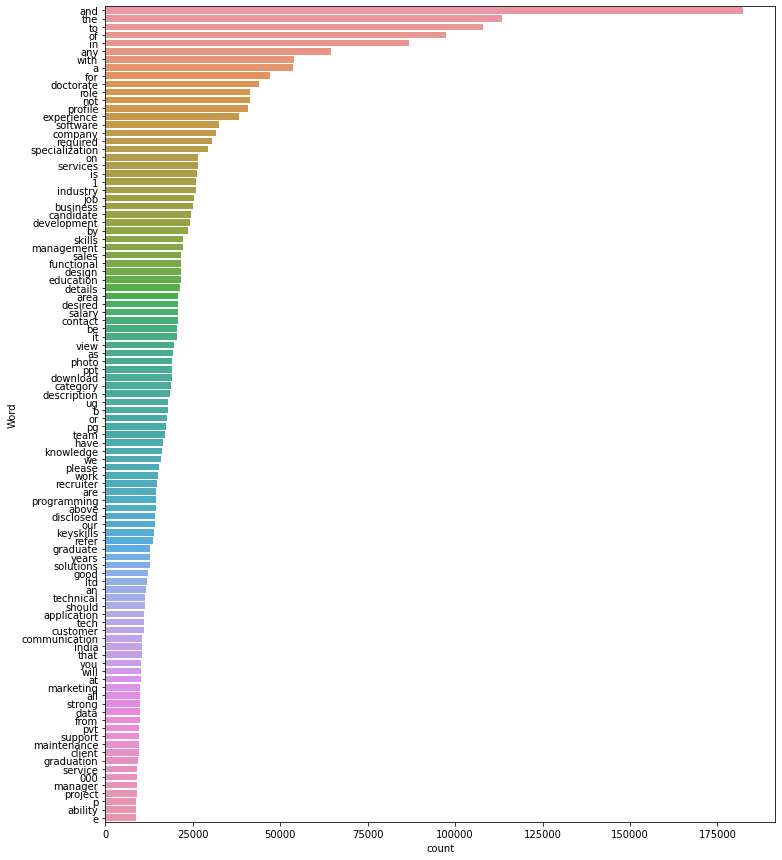

In [67]:
  
# print 100 most frequent words 
freq_words(df['clean_jobdescription'], 100)

In [68]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [69]:
df['clean_jobdescription'] = df['clean_jobdescription'].apply(lambda x: remove_stopwords(x))

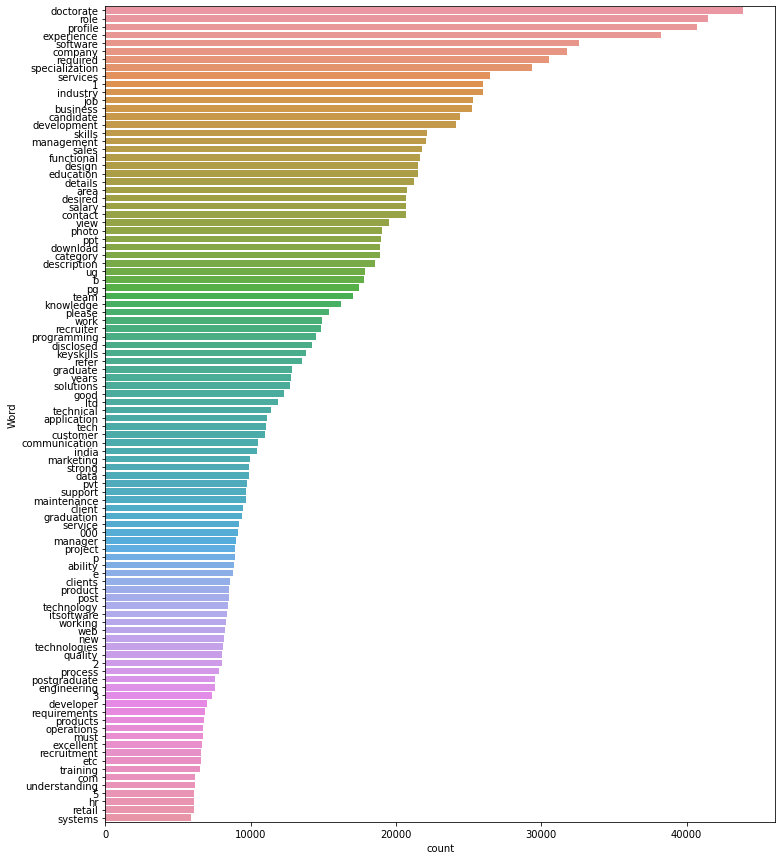

In [70]:
freq_words(df['clean_jobdescription'], 100)

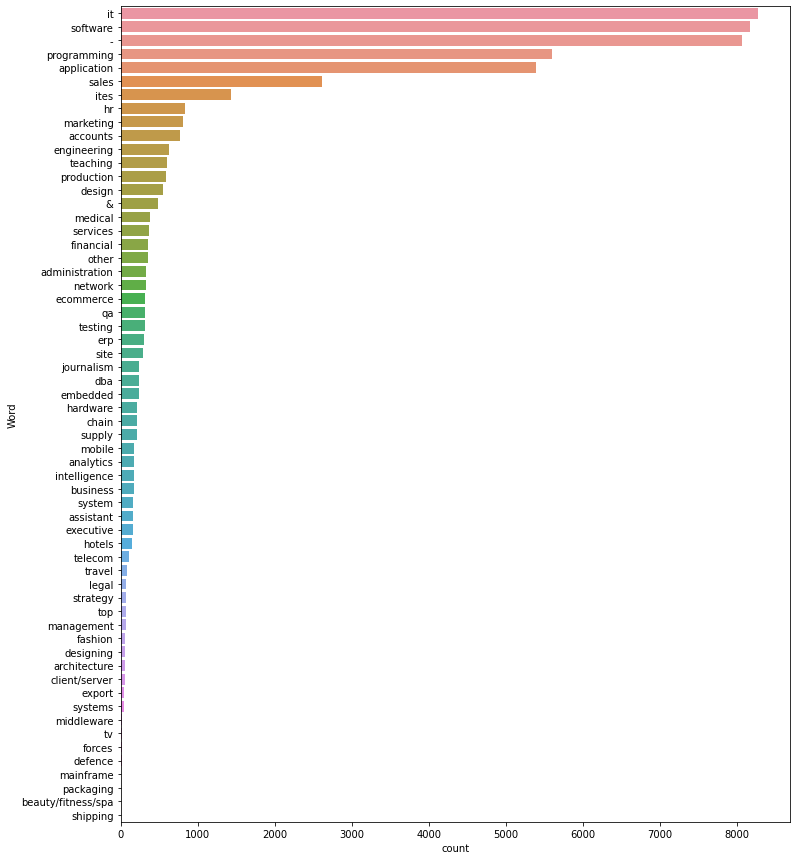

In [76]:
freq_words(df['clean_skills'], 100)

In [77]:
df['industry'].head()

Id
1             [Media ,  Entertainment ,  Internet]
2    [Advertising ,  PR ,  MR ,  Event Management]
3               [IT-Software ,  Software Services]
4       [Banking ,  Financial Services ,  Broking]
5               [IT-Software ,  Software Services]
Name: industry, dtype: object

In [78]:


## MultiLabelBinarizer takes an iterable list and turns it into columns with binary values that represent the list.
#initialize MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 

binary_labels=pd.DataFrame(mlb.fit_transform(df['industry']),columns=mlb.classes_) 

#order columns alphabetically
binary_labels=binary_labels.sort_index(axis=1) 

binary_labels.tail()

,,Accessories,Aerospace Firms,Air Conditioning,Airlines,Analytics,Appliances,Auto Anciliary,Auto Components,Automation,Beauty,Beverage,Biotech,Broking,Call Centre,Cement,Clinical Research,Dairy,Defence,Distillery,Durables,Ecommerce,Electronics,Energy,Engineering,Entertainment,Entry Level,Equipments,Event Management,Finance,Financial Services,Fitness,Foods,Freight,Gaming,Garments,Glassware,Healthcare,Heavy Machinery,Hospitals,...,Fresher,Gems,Glass,Government,Heat Ventilation,ISP,ISP,IT-Hardware & Networking,IT-Software,Industrial Products,Insurance,Internet,Iron and Steel,KPO,Leather,Legal,Media,Medical,Medical Devices,NGO,Office Equipment,Oil and Gas,Other,Pharma,Printing,Publishing,Pulp and Paper,Real Estate,Recruitment,Retail,Security,Semiconductors,Shipping,Strategy,Telecom,Textiles,Travel,Tyres,Water Treatment,Wellness
18950,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# split dataset into training and validation set
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain, xval, ytrain, yval = train_test_split(df['clean_skills'], binary_labels, test_size=0.2, random_state=9)


xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [ ]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for category in industries_list:
    
    # train the model using X_dtm & y
    NB_pipeline.fit(xtrain, ytrain)
    # compute the testing accuracy
    prediction = NB_pipeline.predict(xval)

In [ ]:
# Performance metric
from sklearn.metrics import f1_score
# evaluate performance
f1_score(yval, prediction, average="micro")